<a href="https://colab.research.google.com/github/hamdansyaif/DeepLearning/blob/main/Week_7/IMDb_Dataset_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Tugas Week 7
1. Buat model Deep learning (Pilih TensorFlow atau PyTorch). untuk setiap dataset disamping buatlah BiRNN
2. Gunakan Matriks Evaluasi (Akurasi,Presisi,Recall,F1Squared, AUC, ROC). Visualisasikan matriks akurasi dan loss.
3. Lakukan Hyperparameter Tuning untuk setiap Hyperparameter yang ada.
4. Akurasi pada Training dan Testing Set Minimal Sebesar 90%.
5. Disarankan untuk mengerjakan tugas menggunakan Google Colab. Coba gunakan Google Colab dengan T4 GPU atau TPU agar proses pelatihan model menjadi lebih cepat.

### Saya menggunakan Tensorflow + Keras Tuner

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Load dataset dari TensorFlow Datasets
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=30000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
maxlen = 500
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen)

Visualisasi Data

In [ ]:
print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")
print(f"Example label (y_train[0]): {y_train[0]}")
print(f"Example sequence (x_train[0]): {x_train[0][:500]}...")

Shape of x_train: (25000, 500)
Shape of x_test: (25000, 500)
Example label (y_train[0]): 1
Example sequence (x_train[0]): [    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
  

In [ ]:
# Ambil word_index untuk decode
word_index = keras.datasets.imdb.get_word_index()

# Buat reverse mapping: index -> kata
reverse_word_index = {value + 3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

# Function untuk decode angka ke teks
def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

# Tampilkan contoh review
print("\nExample review (decoded):\n")
print(decode_review(x_train[0]))

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Example review (decoded):

<PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>

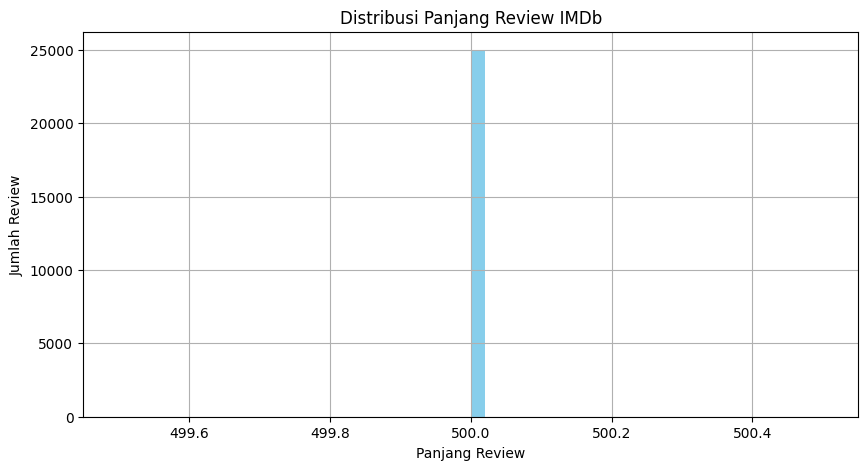

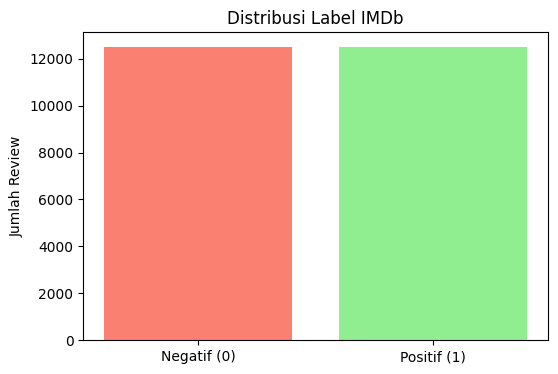

In [ ]:
import matplotlib.pyplot as plt

# --- 1. Distribusi Panjang Review ---
raw_x_train, _ = keras.datasets.imdb.load_data(num_words=30000)
review_lengths = [len(review) for review in raw_x_train[0]]

plt.figure(figsize=(10, 5))
plt.hist([len(review) for review in x_train], bins=50, color='skyblue')
plt.title('Distribusi Panjang Review IMDb')
plt.xlabel('Panjang Review')
plt.ylabel('Jumlah Review')
plt.grid(True)
plt.show()

# --- 2. Distribusi Label ---
labels, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(6, 4))
plt.bar(labels, counts, tick_label=['Negatif (0)', 'Positif (1)'], color=['salmon', 'lightgreen'])
plt.title('Distribusi Label IMDb')
plt.ylabel('Jumlah Review')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Hyperparameters awal (nanti bisa di-tuning pakai Keras Tuner)
vocab_size = 30000  # Jumlah kata unik
embedding_dim = 128
lstm_units = 64
dropout_rate = 0.5

# Build BiRNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=500),
    Bidirectional(LSTM(lstm_units, return_sequences=False)),
    Dropout(dropout_rate),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')  # Output binary (positif/negatif)
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
391/391 - 29s - 74ms/step - accuracy: 0.7589 - loss: 0.4825 - val_accuracy: 0.8343 - val_loss: 0.3728
Epoch 2/5
391/391 - 24s - 61ms/step - accuracy: 0.8956 - loss: 0.2623 - val_accuracy: 0.8729 - val_loss: 0.3408
Epoch 3/5
391/391 - 41s - 105ms/step - accuracy: 0.9454 - loss: 0.1530 - val_accuracy: 0.8642 - val_loss: 0.3739
Epoch 4/5
391/391 - 36s - 92ms/step - accuracy: 0.9698 - loss: 0.0911 - val_accuracy: 0.8492 - val_loss: 0.4150
Epoch 5/5
391/391 - 25s - 64ms/step - accuracy: 0.9752 - loss: 0.0727 - val_accuracy: 0.8559 - val_loss: 0.5514


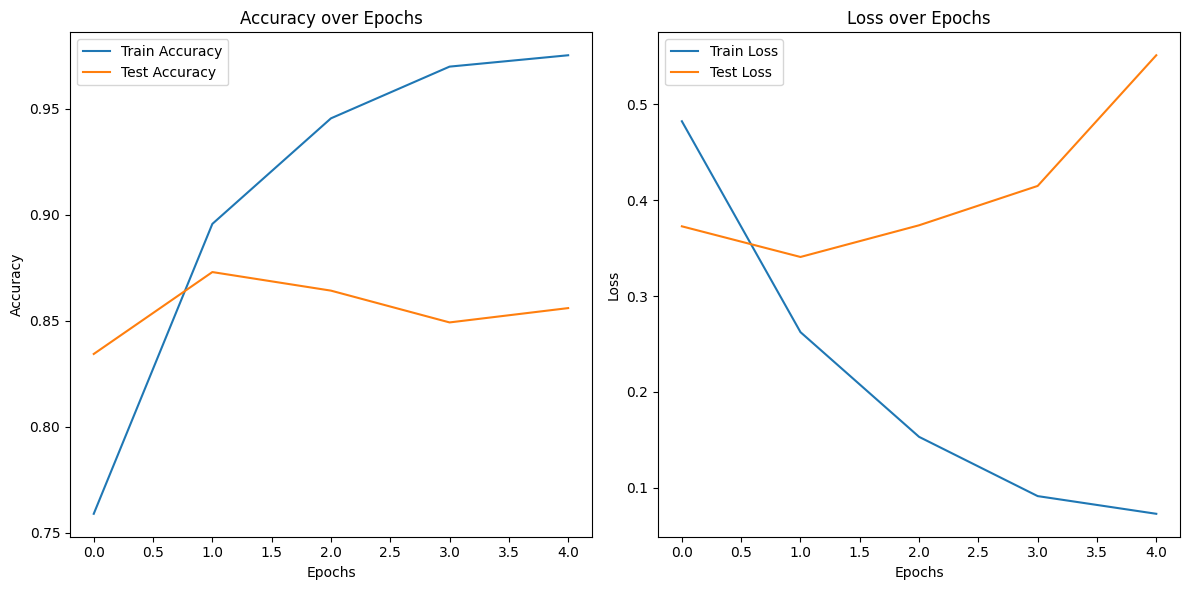

In [ ]:
# Training the model
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=64,
                    validation_data=(x_test, y_test),
                    verbose=2)

# Plotting Accuracy and Loss
# Akurasi
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step
Accuracy: 0.8559
Precision: 0.8395
Recall: 0.8801
F1-Score: 0.8593
AUC: 0.8559


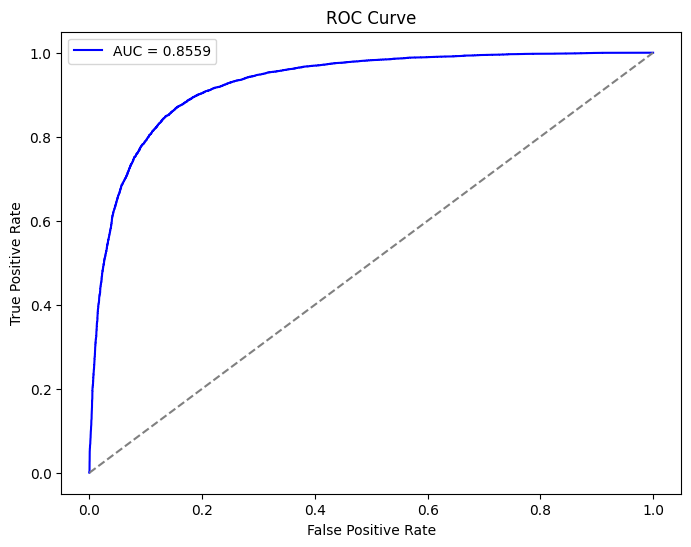

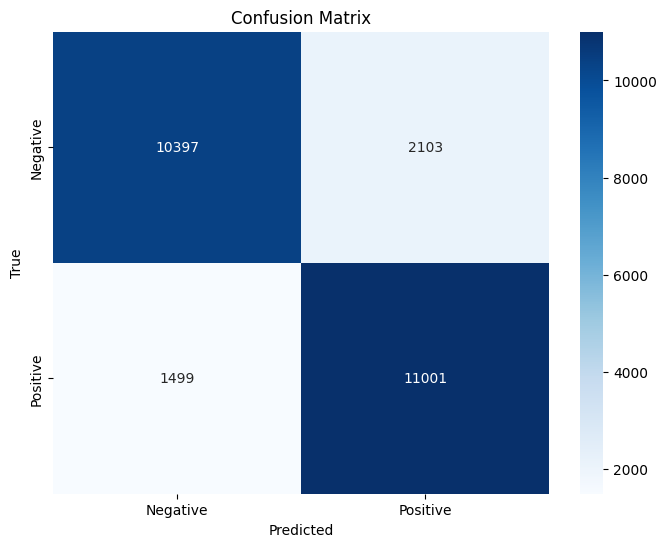

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns

# Prediksi pada test data
y_pred = (model.predict(x_test) > 0.5).astype("int32")

# Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model.predict(x_test))

# Print Metrik
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Confusion Matrix (using seaborn heatmap)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [ ]:
!pip install keras-tuner


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

def build_model(hp):
    model = Sequential()
    model.add(Embedding(
        input_dim=30000,
        output_dim=hp.Choice('embedding_dim', values=[64, 128, 256]),
        input_length=500
    ))
    model.add(Bidirectional(LSTM(
        units=hp.Int('lstm_units', min_value=32, max_value=256, step=32),
        return_sequences=False
    )))
    model.add(Dropout(
        hp.Float('dropout_rate', min_value=0.2, max_value=0.5, step=0.1)
    ))
    model.add(Dense(
        hp.Int('dense_units', min_value=32, max_value=256, step=32),
        activation='relu'
    ))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,  # Coba 10 kombinasi berbeda (bisa kamu ubah)
    executions_per_trial=1,
    directory='my_dir',
    project_name='imdb_birnn'
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
tuner.search(x_train, y_train,
             epochs=5,
             batch_size=64,  # langsung angka, misalnya 64
             validation_data=(x_test, y_test))


Trial 10 Complete [00h 02m 51s]
val_accuracy: 0.8702399730682373

Best val_accuracy So Far: 0.8748000264167786
Total elapsed time: 00h 32m 15s


In [ ]:
best_model = tuner.get_best_models(num_models=1)[0]


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
history = best_model.fit(x_train, y_train,
                         epochs=10,  # Bisa ubah ke 15 atau 20 biar makin mantap
                         batch_size=64,
                         validation_data=(x_test, y_test),
                         verbose=2)


Epoch 1/10
391/391 - 34s - 86ms/step - accuracy: 0.9352 - loss: 0.1772 - val_accuracy: 0.8709 - val_loss: 0.3249
Epoch 2/10
391/391 - 39s - 99ms/step - accuracy: 0.9554 - loss: 0.1248 - val_accuracy: 0.7886 - val_loss: 0.4882
Epoch 3/10
391/391 - 44s - 111ms/step - accuracy: 0.9721 - loss: 0.0831 - val_accuracy: 0.8546 - val_loss: 0.5061
Epoch 4/10
391/391 - 29s - 75ms/step - accuracy: 0.9865 - loss: 0.0419 - val_accuracy: 0.8505 - val_loss: 0.6322
Epoch 5/10
391/391 - 41s - 104ms/step - accuracy: 0.9883 - loss: 0.0338 - val_accuracy: 0.8545 - val_loss: 0.5945
Epoch 6/10
391/391 - 41s - 106ms/step - accuracy: 0.9902 - loss: 0.0305 - val_accuracy: 0.8598 - val_loss: 0.6665
Epoch 7/10
391/391 - 43s - 109ms/step - accuracy: 0.9946 - loss: 0.0190 - val_accuracy: 0.8442 - val_loss: 0.7705
Epoch 8/10
391/391 - 41s - 105ms/step - accuracy: 0.9934 - loss: 0.0222 - val_accuracy: 0.8262 - val_loss: 0.8599
Epoch 9/10
391/391 - 41s - 104ms/step - accuracy: 0.9968 - loss: 0.0119 - val_accuracy: 0.8

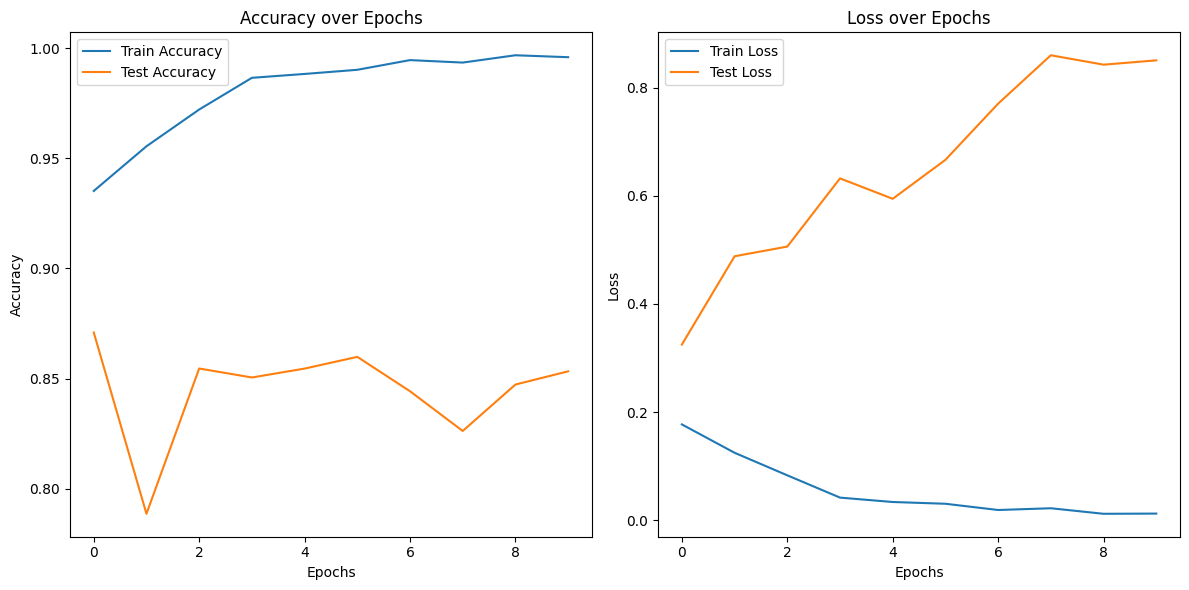

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# Akurasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step
Accuracy: 0.8533
Precision: 0.8696
Recall: 0.8312
F1-Score: 0.8500
AUC: 0.8533


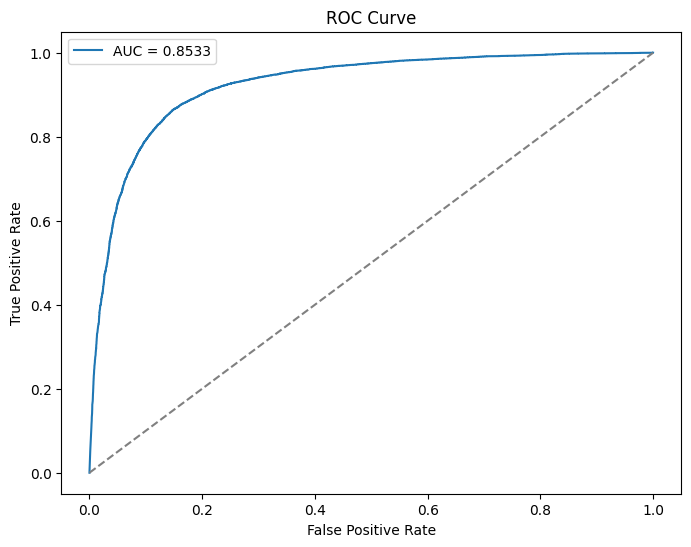

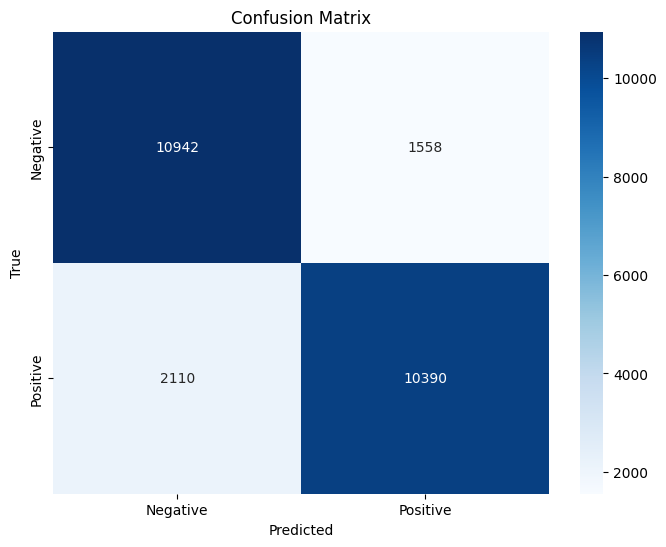

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns

# Prediksi
y_pred = (best_model.predict(x_test) > 0.5).astype("int32")

# Hitung Metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, best_model.predict(x_test))

# Print Metrik
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

### Deep RNN Models

In [ ]:
def build_deep_rnn(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Embedding(input_dim=VOCAB_SIZE, output_dim=hp.Int('embed_dim', 32, 128, step=32)))

    for i in range(hp.Int('rnn_layers', 2, 4)):  # 2 sampai 4 layer RNN
        model.add(tf.keras.layers.SimpleRNN(
            units=hp.Int(f'rnn_units_{i}', min_value=32, max_value=128, step=32),
            return_sequences=True if i < hp.get('rnn_layers') - 1 else False
        ))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model


Trial 10 Complete [00h 04m 10s]
val_accuracy: 0.8602399826049805

Best val_accuracy So Far: 0.8628399968147278
Total elapsed time: 00h 36m 28s
Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


391/391 - 25s - 64ms/step - accuracy: 0.9329 - loss: 0.1845 - val_accuracy: 0.8592 - val_loss: 0.3302
Epoch 2/15
391/391 - 38s - 96ms/step - accuracy: 0.9572 - loss: 0.1269 - val_accuracy: 0.8513 - val_loss: 0.3697
Epoch 3/15
391/391 - 21s - 54ms/step - accuracy: 0.9740 - loss: 0.0846 - val_accuracy: 0.8565 - val_loss: 0.4023
Epoch 4/15
391/391 - 20s - 52ms/step - accuracy: 0.9858 - loss: 0.0532 - val_accuracy: 0.8536 - val_loss: 0.5224
Epoch 5/15
391/391 - 19s - 49ms/step - accuracy: 0.9918 - loss: 0.0349 - val_accuracy: 0.8394 - val_loss: 0.5611
Epoch 6/15
391/391 - 21s - 55ms/step - accuracy: 0.9943 - loss: 0.0239 - val_accuracy: 0.8170 - val_loss: 0.6573
Epoch 7/15
391/391 - 21s - 53ms/step - accuracy: 0.9950 - loss: 0.0189 - val_accuracy: 0.8333 - val_loss: 0.6579
Epoch 8/15
391/391 - 20s - 51ms/step - accuracy: 0.9973 - loss: 0.0119 - val_accuracy: 0.8450 - val_loss: 0.6569
Epoch 9/15
391/391 - 20s - 52ms/step - accuracy: 0.9991 - loss: 0.0058 - val_accuracy: 0.8473 - val_loss: 0

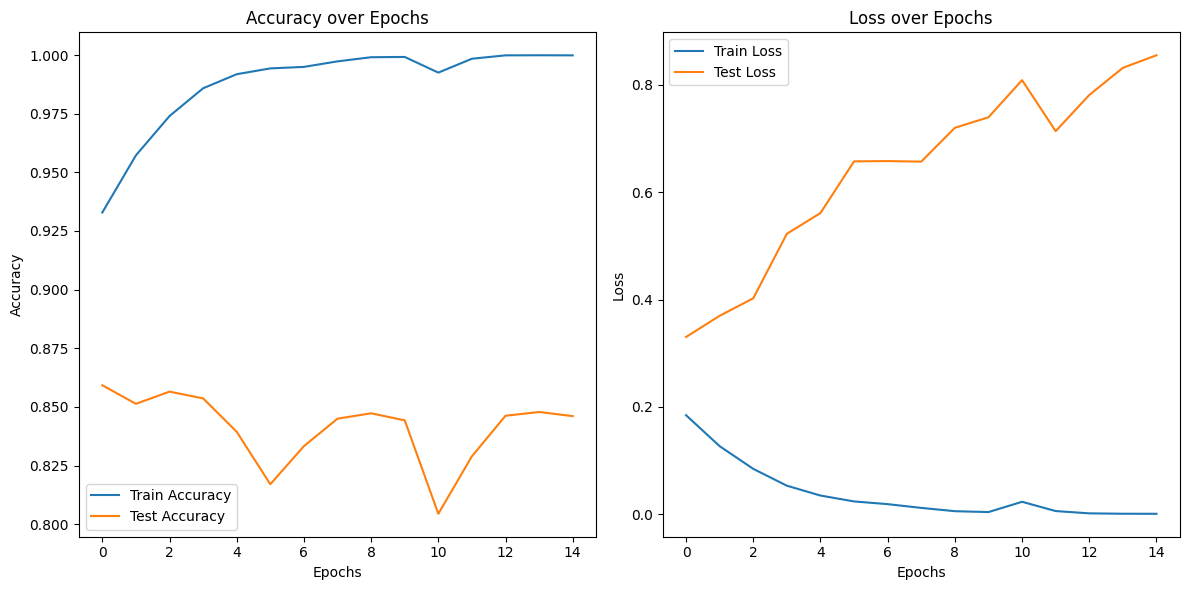

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step
Accuracy: 0.8461
Precision: 0.8454
Recall: 0.8471
F1-Score: 0.8462
AUC: 0.8461
782/782 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


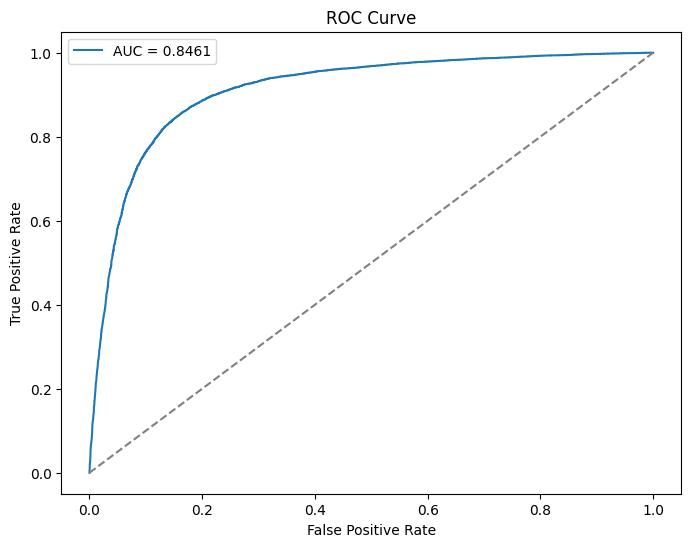

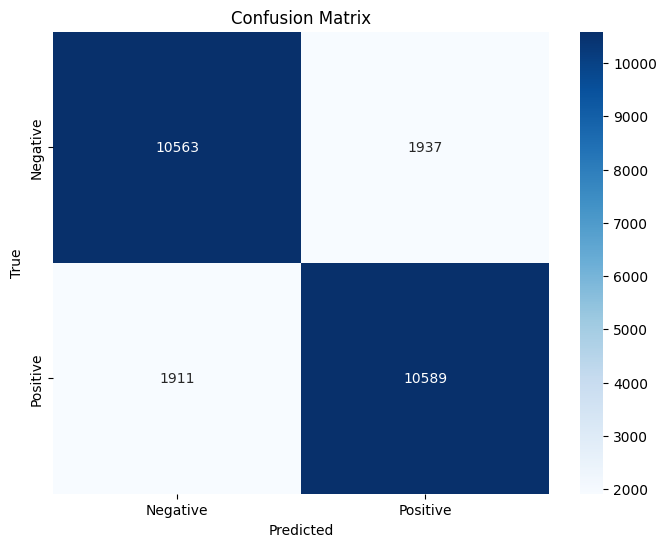

In [ ]:
# 1. Import Library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import seaborn as sns

# 2. Load Dataset IMDb
VOCAB_SIZE = 30000  # kamu bisa atur 30000 - 50000 sesuai kebutuhan
MAX_LEN = 300       # maksimal panjang review

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=VOCAB_SIZE)

# Padding sequences supaya sama panjang
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=MAX_LEN)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=MAX_LEN)

# 3. Build Deep RNN Model
def build_deep_rnn(hp):
    model = keras.Sequential()
    model.add(layers.Embedding(input_dim=VOCAB_SIZE,
                               output_dim=hp.Int('embed_dim', min_value=32, max_value=128, step=32)))

    # Tambahkan beberapa layer RNN
    for i in range(hp.Int('rnn_layers', 2, 4)):  # 2 - 3 layer
        model.add(layers.SimpleRNN(
            units=hp.Int(f'rnn_units_{i}', min_value=32, max_value=128, step=32),
            return_sequences=True if i < hp.get('rnn_layers') - 1 else False
        ))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-3, 5e-4, 1e-4])),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# 4. Setup Hyperparameter Tuner
tuner = kt.RandomSearch(
    build_deep_rnn,
    objective='val_accuracy',
    max_trials=10,
    directory='deep_rnn_tuner',
    project_name='imdb_deep_rnn'
)

# 5. Cari Hyperparameter Terbaik
tuner.search(x_train, y_train,
             epochs=5,
             validation_data=(x_test, y_test),
             batch_size=64)

# 6. Ambil Model Terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# 7. Training Ulang Model Terbaik
history = best_model.fit(
    x_train, y_train,
    epochs=15,   # panjangin dikit training supaya maksimal
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose=2
)

# 8. Visualisasi Accuracy dan Loss
plt.figure(figsize=(12, 6))
# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# 9. Evaluasi Model
y_pred = (best_model.predict(x_test) > 0.5).astype('int32')

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-Score: {f1:.4f}')
print(f'AUC: {auc:.4f}')

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, best_model.predict(x_test))

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc:.4f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
